# Filtrage numérique – version simplifiée

Code sans fonctions supplémentaires.

In [26]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [28]:
EXPORT_DIR = 'export_figures'
os.makedirs(EXPORT_DIR, exist_ok=True)

## Exercice 1

In [29]:

Te = 1
N1 = 6
N2 = 1
s1 = -1
s2 = 1

num1 = np.r_[1, np.zeros(N1-1), s1]
den1 = np.r_[1, np.zeros(N2-1), s2]

num1, den1


(array([ 1.,  0.,  0.,  0.,  0.,  0., -1.]), array([1., 1.]))

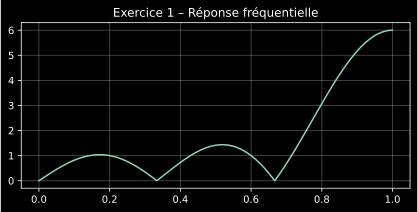

In [30]:

w, H = signal.freqz(num1, den1, worN=2048)
f = w/np.pi

plt.figure(figsize=(7,3))
plt.plot(f, np.abs(H))
plt.title("Exercice 1 – Réponse fréquentielle")
plt.grid(True, alpha=0.3)
plt.show()


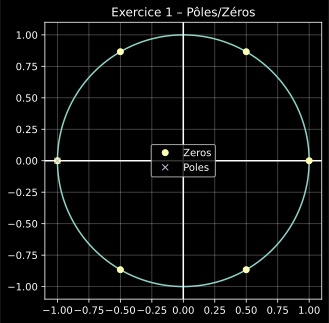

In [31]:

zeros, poles, _ = signal.tf2zpk(num1, den1)

plt.figure(figsize=(5,5))
th = np.linspace(0, 2*np.pi, 512)
plt.plot(np.cos(th), np.sin(th))
plt.axhline(0); plt.axvline(0)
plt.plot(np.real(zeros), np.imag(zeros), 'o', label="Zeros")
plt.plot(np.real(poles), np.imag(poles), 'x', label="Poles")
plt.gca().set_aspect('equal', 'box')
plt.title("Exercice 1 – Pôles/Zéros")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


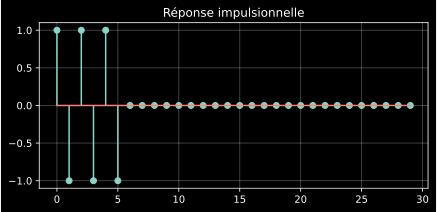

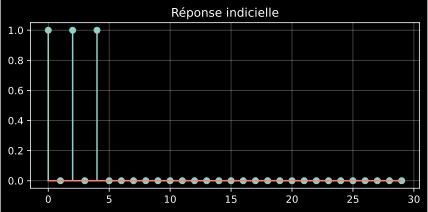

In [32]:

n = 30
k = np.arange(n)
u_imp = np.zeros(n); u_imp[0] = 1
u_step = np.ones(n)

h = signal.lfilter(num1, den1, u_imp)
s = signal.lfilter(num1, den1, u_step)

plt.figure(figsize=(7,3))
plt.stem(k, h)
plt.title("Réponse impulsionnelle")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(7,3))
plt.stem(k, s)
plt.title("Réponse indicielle")
plt.grid(True, alpha=0.3)
plt.show()
